In [1]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import numpy as np

In [1]:
census = gpd.read_file('Census tract.shp')

In [3]:
print(len(census))
len(census['boro_ct201'].unique())

2165


2165

In [4]:
building_shp = gpd.read_file('buildings.shp')
building_shp.head()

,base_bbl,bin,cnstrct_yr,doitt_id,feat_code,geomsource,groundelev,heightroof,date_lstmo,time_lstmo,lststatype,mpluto_bbl,name,shape_area,shape_len,geometry
0,3044520815,3394646.0,2009.0,1212853.0,2100.0,Photogramm,18.0,21.608508,2017-08-22,00:00:00.000,Constructed,3044520815,None,854.662433,125.079796,"POLYGON ((-73.87130 40.65717, -73.87136 40.657..."
1,4030640041,4548330.0,1930.0,1226227.0,5110.0,Photogramm,122.0,10.360000,2017-08-17,00:00:00.000,Constructed,4030640041,None,217.594243,60.225858,"POLYGON ((-73.87671 40.71425, -73.87677 40.714..."
2,4139430001,4460479.0,1960.0,581946.0,2100.0,Photogramm,10.0,29.811570,2017-08-22,00:00:00.000,Constructed,4139430001,None,946.427476,123.141941,"POLYGON ((-73.85195 40.66235, -73.85195 40.662..."
3,3049720006,3355684.0,1920.0,858061.0,5110.0,Photogramm,32.0,11.200000,2017-08-17,00:00:00.000,Constructed,3049720006,None,248.678169,63.940817,"POLYGON ((-73.94029 40.64108, -73.94034 40.641..."
4,3055100055,3131737.0,1915.0,568078.0,2100.0,Photogramm,44.0,24.980000,2017-08-22,00:00:00.000,Constructed,3055100055,None,1163.227669,165.608763,"POLYGON ((-73.98999 40.62384, -73.98998 40.623..."


In [5]:
geodata = gpd.sjoin(building_shp, census, op='within',how='left')

In [6]:
geodata.shape

(1084809, 28)

In [7]:
geodata.rename(columns={'shape_area_right':'census_area','shape_area_left':'building_area','cnstrct_yr':'built_year','heightroof':'height'},inplace=True)
geodata.columns

Index(['base_bbl', 'bin', 'built_year', 'doitt_id', 'feat_code', 'geomsource',
       'groundelev', 'height', 'date_lstmo', 'time_lstmo', 'lststatype',
       'mpluto_bbl', 'name', 'building_area', 'shape_len', 'geometry',
       'index_right', 'boro_code', 'boro_ct201', 'boro_name', 'cdeligibil',
       'ct2010', 'ctlabel', 'ntacode', 'ntaname', 'puma', 'census_area',
       'shape_leng'],
      dtype='object')

In [8]:
geodata2 = geodata[['built_year','height','building_area','census_area','boro_ct201']]
len(geodata2)

1084809

In [9]:
geodata2.dropna(inplace = True)
len(geodata2)
geodata2 = pd.DataFrame.drop_duplicates(geodata2) 
len(geodata2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1070594

In [10]:
geodata2 = geodata2[(geodata2['built_year'] > 1700)&(geodata2['built_year'] <=2021)  & (geodata2['height'] > 0) & (geodata2['census_area'] > 0) & (geodata2['building_area'] > 0)]
len(geodata2)

1070429

In [11]:
census_statistic = geodata2.groupby(['boro_ct201']).agg({'built_year':'mean', 'height':'mean','building_area':'sum', 'census_area':'mean'})
census_statistic.head()

,built_year,height,building_area,census_area
boro_ct201,,,,
1000100,1905.409091,39.641364,442198.535188,1.844421e+06
1000201,1915.435897,69.361282,181519.374389,9.715994e+05
1000202,1926.904110,64.426135,465781.516904,3.315114e+06
1000500,1900.000000,28.683493,863292.179491,9.083215e+06
1000600,1929.305882,67.839248,584017.362496,2.583418e+06


In [12]:
census_statistic['building_density'] = census_statistic['building_area']/census_statistic['census_area']
census_statistic.reset_index()

,boro_ct201,built_year,height,building_area,census_area,building_density
0,1000100,1905.409091,39.641364,4.421985e+05,1.844421e+06,0.239749
1,1000201,1915.435897,69.361282,1.815194e+05,9.715994e+05,0.186825
2,1000202,1926.904110,64.426135,4.657815e+05,3.315114e+06,0.140502
3,1000500,1900.000000,28.683493,8.632922e+05,9.083215e+06,0.095043
4,1000600,1929.305882,67.839248,5.840174e+05,2.583418e+06,0.226064
...,...,...,...,...,...,...
2156,5030301,1973.366912,24.261096,1.408449e+06,7.812087e+06,0.180291
2157,5030302,1981.337260,27.877848,1.667826e+06,9.788180e+06,0.170392
2158,5031901,1969.900881,24.730974,7.174476e+05,4.126596e+06,0.173859
2159,5031902,1954.995504,24.320446,1.328226e+06,7.019455e+06,0.189221


In [13]:
census_statistic_geo = census.merge(census_statistic, on='boro_ct201',how='left')
census_statistic_geo.head()

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry,built_year,height,building_area,census_area,building_density
0,5,5000900,Staten Island,E,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,"POLYGON ((-74.07921 40.64343, -74.07914 40.643...",1934.786432,30.112091,5.371976e+05,2.497010e+06,0.215136
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,"POLYGON ((-73.96433 40.75638, -73.96479 40.755...",1921.185410,72.242529,9.307718e+05,1.906016e+06,0.488334
2,1,1010200,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,"POLYGON ((-73.97124 40.76094, -73.97170 40.760...",1940.123711,220.375560,9.912308e+05,1.860993e+06,0.532636
3,1,1010400,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,"POLYGON ((-73.97446 40.76229, -73.97491 40.761...",1932.297030,175.648996,1.050598e+06,1.864600e+06,0.563444
4,1,1011300,Manhattan,I,011300,113,MN17,Midtown-Midtown South,3807,1.890907e+06,5699.860641,"POLYGON ((-73.98412 40.75484, -73.98460 40.754...",1934.352381,204.443448,1.012941e+06,1.890907e+06,0.535690


<AxesSubplot:>

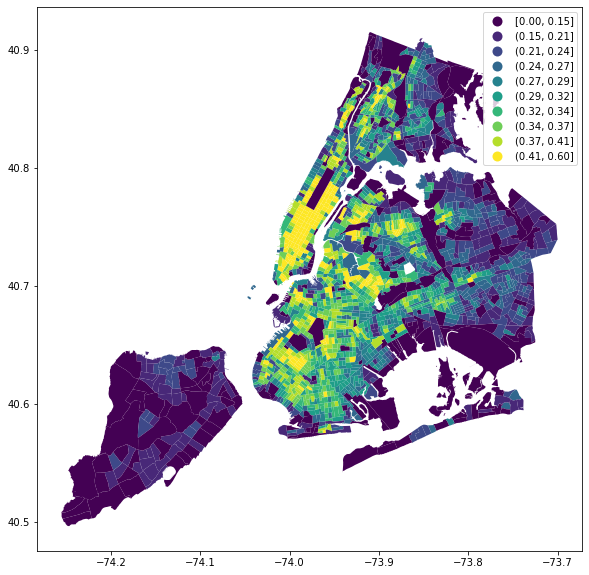

In [22]:
census_statistic_geo.plot(figsize=(10,10), column='building_density', k=10, scheme='Quantiles',legend=True)